In [1]:
# importing of libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading of data
data = pd.read_excel('data_gst.xlsx')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Basic Checks

In [3]:
# prints first 5 rows of the data
data.head()

,Year,Month,Date,State,GST AMOUNT (CRORES)
0,2019,Jan,2019-01-01,Jammu and Kashmir,331.0
1,2019,Jan,2019-01-01,Himachal Pradesh,647.0
2,2019,Jan,2019-01-01,Punjab,1216.0
3,2019,Jan,2019-01-01,Chandigarh,159.0
4,2019,Jan,2019-01-01,Uttarakhand,1146.0


In [5]:
# prints last5 rows of the data
data.tail()

,Year,Month,Date,State,GST AMOUNT (CRORES)
970,2021,Oct,2021-10-01,Telangana,3854.0
971,2021,Oct,2021-10-01,Andhra Pradesh,2879.0
972,2021,Oct,2021-10-01,Ladakh,19.0
973,2021,Oct,2021-10-01,Other Territory,137.0
974,2021,Oct,2021-10-01,Centre Jurisdiction,189.0


In [6]:
# used to view some basic statistical details like percentile, mean, std etc
data.describe()

,Year,GST AMOUNT (CRORES)
count,975.000000,975.000000
mean,2019.880000,2055.639764
std,0.765638,3026.732929
min,2019.000000,0.000000
25%,2019.000000,106.000000
50%,2020.000000,912.000000
75%,2020.000000,2837.000000
max,2021.000000,19355.000000


In [7]:
# to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 975 non-null    int64         
 1   Month                975 non-null    object        
 2   Date                 975 non-null    datetime64[ns]
 3   State                975 non-null    object        
 4   GST AMOUNT (CRORES)  975 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 38.2+ KB


In [8]:
# it shows the number columns and rows that data consists
data.shape

(975, 5)

In [9]:
# displays all the columns
data.columns

Index(['Year', 'Month', 'Date', 'State', 'GST AMOUNT (CRORES)'], dtype='object')

## Data Preprocessing

In [4]:
# These are the new columns
## the columns from the original can be renamed at our convinience
data=data.rename(columns={'GST AMOUNT (CRORES)':'GST_Amount_In_Crores'})

In [11]:
data.columns

Index(['Year', 'Month', 'Date', 'State', 'GST_Amount_In_Crores'], dtype='object')

In [10]:
#checking null
data.isnull().values.any()

False

In [16]:
data.isna().any()

Year                    False
Month                   False
Date                    False
State                   False
GST_Amount_In_Crores    False
dtype: bool

In [15]:
data.isnull().sum()

Year                    0
Month                   0
Date                    0
State                   0
GST_Amount_In_Crores    0
dtype: int64

### Value count and unique in columns

In [8]:
data.tail()

,Year,Month,Date,State,GST_Amount_In_Crores
970,2021,Oct,2021-10-01,Telangana,3854.0
971,2021,Oct,2021-10-01,Andhra Pradesh,2879.0
972,2021,Oct,2021-10-01,Ladakh,19.0
973,2021,Oct,2021-10-01,Other Territory,137.0
974,2021,Oct,2021-10-01,Centre Jurisdiction,189.0


In [5]:
data['GST_Amount_In_Crores'].nunique()

769

In [12]:
data.GST_Amount_In_Crores.value_counts()

0.00        18
1.00        13
32.00        8
25.00        7
2.00         6
35.00        6
30.00        6
20.00        5
21.00        5
159.00       5
19.00        5
141.00       5
161.00       4
157.00       4
46.00        4
24.00        4
17.00        4
58.00        4
117.00       4
165.00       4
158.00       4
28.00        3
26.00        3
137.00       3
152.00       3
139.00       3
50.00        3
38.00        3
106.00       3
67.00        3
127.00       3
119.00       3
29.00        3
45.00        3
160.00       3
7.00         3
43.00        3
52.00        3
145.00       3
120.00       3
15.00        3
33.00        3
3747.00      2
59.00        2
153.00       2
3.00         2
2176.00      2
36.00        2
74.00        2
1568.00      2
23.00        2
342.00       2
133.00       2
129.00       2
97.00        2
6185.00      2
65.00        2
186.00       2
2093.00      2
173.00       2
41.00        2
377.00       2
95.00        2
1340.00      2
121.00       2
101.00       2
16.00     

In [9]:
data[(data['GST_Amount_In_Crores'] == 0)]

,Year,Month,Date,State,GST_Amount_In_Crores
36,2019,Jan,2019-01-01,Ladakh,0.0
75,2019,Feb,2019-02-01,Ladakh,0.0
114,2019,Mar,2019-03-01,Ladakh,0.0
153,2019,Jun,2019-06-01,Ladakh,0.0
192,2019,Aug,2019-08-01,Ladakh,0.0
231,2019,Sep,2019-09-01,Ladakh,0.0
270,2019,Oct,2019-10-01,Ladakh,0.0
309,2019,Nov,2019-11-01,Ladakh,0.0
348,2019,Dec,2019-12-01,Ladakh,0.0
387,2020,Jan,2020-01-01,Ladakh,0.0


In [13]:
#checking out the number of object present.
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Month    10
State    39
dtype: int64

In [8]:
data.Month.unique()

array(['Jan', 'Feb', 'Mar', 'Jun', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Jul'], dtype=object)

In [19]:
data.Month.value_counts()

Oct    117
Aug    117
Feb    117
Mar    117
Sep    117
Jan     78
Jul     78
Nov     78
Dec     78
Jun     78
Name: Month, dtype: int64

In [15]:
data.State.unique()

array(['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Bihar', 'Sikkim', 'Arunachal Pradesh', 'Nagaland', 'Manipur',
       'Mizoram', 'Tripura', 'Meghalaya', 'Assam', 'West Bengal',
       'Jharkhand', 'Odisha', 'Chhattisgarh', 'Madhya Pradesh', 'Gujarat',
       'Daman and Diu', 'Dadra and Nagar Haveli', 'Maharashtra',
       'Karnataka', 'Goa', 'Lakshadweep', 'Kerala', 'Tamil Nadu',
       'Puducherry', 'Andaman and Nicobar Islands', 'Telangana',
       'Andhra Pradesh', 'Ladakh', 'Other Territory',
       'Centre Jurisdiction'], dtype=object)

In [20]:
data.State.value_counts()

Delhi                          25
Punjab                         25
Uttar Pradesh                  25
Sikkim                         25
Arunachal Pradesh              25
Karnataka                      25
Other Territory                25
Nagaland                       25
Gujarat                        25
Andhra Pradesh                 25
Puducherry                     25
Centre Jurisdiction            25
Jammu and Kashmir              25
Manipur                        25
Ladakh                         25
Bihar                          25
Maharashtra                    25
Jharkhand                      25
West Bengal                    25
Uttarakhand                    25
Daman and Diu                  25
Goa                            25
Meghalaya                      25
Himachal Pradesh               25
Chhattisgarh                   25
Andaman and Nicobar Islands    25
Haryana                        25
Assam                          25
Telangana                      25
Tripura       

In [16]:
data['Year'].nunique()

3

In [7]:
data.Year.unique()

array([2019, 2020, 2021], dtype=int64)

In [21]:
data.Year.value_counts()

2020    390
2019    351
2021    234
Name: Year, dtype: int64

In [17]:
data['Date'].nunique()

25

In [22]:
data.Date.value_counts()

2019-01-01    39
2020-03-01    39
2020-09-01    39
2019-09-01    39
2021-10-01    39
2021-03-01    39
2020-12-01    39
2021-02-01    39
2019-12-01    39
2020-02-01    39
2021-08-01    39
2020-10-01    39
2019-10-01    39
2019-11-01    39
2019-03-01    39
2019-02-01    39
2020-08-01    39
2019-08-01    39
2020-06-01    39
2020-01-01    39
2019-06-01    39
2021-07-01    39
2021-09-01    39
2020-11-01    39
2020-07-01    39
Name: Date, dtype: int64

In [10]:
data.dtypes

Year                             int64
Month                           object
Date                    datetime64[ns]
State                           object
GST_Amount_In_Crores           float64
dtype: object

In [24]:
data.describe(include=['object'])

,Month,State
count,975,975
unique,10,39
top,Feb,Jharkhand
freq,117,25


In [25]:
data.describe(include=['datetime'])

,Date
count,975
unique,25
top,2019-01-01 00:00:00
freq,39
first,2019-01-01 00:00:00
last,2021-10-01 00:00:00


In [26]:
data.describe(include=['float'])

,GST_Amount_In_Crores
count,975.000000
mean,2055.639764
std,3026.732929
min,0.000000
25%,106.000000
50%,912.000000
75%,2837.000000
max,19355.000000


# Exploratory Data Analysis

### Univariate Analysis

In [34]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data,title="Pandas Profiling Report", minimal=True)
profile.to_widgets()
profile.to_file("GST_Pandas_Profiling_Report.html")

Summarize dataset:   0%|          | 0/13 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Insights from univariate analysis

1)Year - There are 3 distinct years, which are 2019,2020 and 2021. 
         With 2020 being highest with 390,
         2019 with 351 and
         2021 being least with 234
            
2)Month - There are 10 distinct months, which are Feb(117),Sep(117),Oct(117),Aug(117),Mar(117)
          Nov(78),Jun(78),Jan(78),Jul(78),Dec(78)

3)Date - There are 25 Distinct dates 

4)State - There are 39 Distinct states and all states are equal number(25)

5)GST_Amount - With zero being the highest occurrence(18) and highest gst collected is 19355(crore) and minimun is zero
               and average of 2055.63

## Multivariate Analysis

In [35]:
## since the target value in the data contains Nan value,data need to be imputed for further analysis
report1=sv.analyze([data,'data'],target_feat='GST_Amount_In_Crores')
report1.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Checking values 

In [28]:
data.head()

,Year,Month,Date,State,GST_Amount_In_Crores
0,2019,Jan,2019-01-01,Jammu and Kashmir,331.0
1,2019,Jan,2019-01-01,Himachal Pradesh,647.0
2,2019,Jan,2019-01-01,Punjab,1216.0
3,2019,Jan,2019-01-01,Chandigarh,159.0
4,2019,Jan,2019-01-01,Uttarakhand,1146.0


### Year

In [42]:
## Yearwise collection of GST
data.groupby('Year').GST_Amount_In_Crores.sum()

Year
2019    689254.00
2020    779593.48
2021    535401.29
Name: GST_Amount_In_Crores, dtype: float64

In [26]:
## Yearwise mean of GST
data.groupby(by='Year')['GST_Amount_In_Crores'].mean()

Year
2019    1963.686610
2020    1998.957641
2021    2288.039701
Name: GST_Amount_In_Crores, dtype: float64

In [74]:
data_20 = data[(data['Year']== 2020)]
data_20

,Year,Month,Date,State,GST_Amount_In_Crores
351,2020,Jan,2020-01-01,Jammu and Kashmir,371.00
352,2020,Jan,2020-01-01,Himachal Pradesh,675.00
353,2020,Jan,2020-01-01,Punjab,1340.00
354,2020,Jan,2020-01-01,Chandigarh,195.00
355,2020,Jan,2020-01-01,Uttarakhand,1257.00
356,2020,Jan,2020-01-01,Haryana,5487.00
357,2020,Jan,2020-01-01,Delhi,3967.00
358,2020,Jan,2020-01-01,Rajasthan,3030.00
359,2020,Jan,2020-01-01,Uttar Pradesh,5698.00
360,2020,Jan,2020-01-01,Bihar,1122.00


In [75]:
## Year 2020 collection of GST per months
month_20=data_20.groupby('Month').GST_Amount_In_Crores.sum() 
month_20.sort_values(ascending=False)

Month
Dec    87151.00
Jan    86513.00
Feb    83576.48
Nov    82073.00
Oct    80849.00
Mar    78691.00
Jun    75602.00
Sep    72247.00
Aug    66598.00
Jul    66293.00
Name: GST_Amount_In_Crores, dtype: float64

In [76]:
## Year 2020 collection of GST per states
state_20=data_20.groupby('State').GST_Amount_In_Crores.sum() 
state_20.sort_values(ascending=False)

State
Maharashtra                    149963.66
Karnataka                       67810.83
Gujarat                         66953.54
Tamil Nadu                      61505.49
Uttar Pradesh                   55169.91
Haryana                         49000.43
West Bengal                     35453.54
Delhi                           33053.75
Telangana                       32859.13
Rajasthan                       28813.09
Odisha                          25508.16
Madhya Pradesh                  24629.03
Andhra Pradesh                  23636.33
Chhattisgarh                    21242.41
Jharkhand                       18111.87
Kerala                          15726.12
Punjab                          12718.94
Uttarakhand                     11490.93
Bihar                           10531.50
Assam                            8932.87
Himachal Pradesh                 6484.69
Jammu and Kashmir                3335.17
Goa                              3149.61
Sikkim                           1975.65
Dadra and 

In [82]:
# Dec 2020 collection of GST per states
data[(data['Year']== 2020) & (data['Month'] == 'Dec')]

,Year,Month,Date,State,GST_Amount_In_Crores
702,2020,Dec,2020-12-01,Jammu and Kashmir,318.0
703,2020,Dec,2020-12-01,Himachal Pradesh,670.0
704,2020,Dec,2020-12-01,Punjab,1353.0
705,2020,Dec,2020-12-01,Chandigarh,158.0
706,2020,Dec,2020-12-01,Uttarakhand,1246.0
707,2020,Dec,2020-12-01,Haryana,5747.0
708,2020,Dec,2020-12-01,Delhi,3451.0
709,2020,Dec,2020-12-01,Rajasthan,3135.0
710,2020,Dec,2020-12-01,Uttar Pradesh,5937.0
711,2020,Dec,2020-12-01,Bihar,1067.0


In [78]:
data[(data['Year'] == 2020) & (data['Month'] == 'Dec') & (data['State'] == 'Punjab')]

,Year,Month,Date,State,GST_Amount_In_Crores
704,2020,Dec,2020-12-01,Punjab,1353.0


### Month

In [60]:
## monthwise mean of GST
monthwise_gst_M=data.groupby('Month').GST_Amount_In_Crores.mean() 
monthwise_gst_M.sort_values(ascending=False)

Month
Mar    2160.057521
Dec    2156.294872
Oct    2140.478632
Feb    2107.949060
Jan    2103.307692
Nov    2099.307692
Jul    1973.987179
Jun    1957.500000
Sep    1950.205128
Aug    1911.376068
Name: GST_Amount_In_Crores, dtype: float64

In [32]:
## Monthwise collection of GST
monthwise_gst_M=data.groupby('Month').GST_Amount_In_Crores.sum() 
monthwise_gst_M.sort_values(ascending=False)

Month
Mar    252726.73
Oct    250436.00
Feb    246630.04
Sep    228174.00
Aug    223631.00
Dec    168191.00
Jan    164058.00
Nov    163746.00
Jul    153971.00
Jun    152685.00
Name: GST_Amount_In_Crores, dtype: float64

In [67]:
data_Mar = data[(data['Month'] == 'Mar')]
data_Mar

,Year,Month,Date,State,GST_Amount_In_Crores
78,2019,Mar,2019-03-01,Jammu and Kashmir,388.00
79,2019,Mar,2019-03-01,Himachal Pradesh,660.00
80,2019,Mar,2019-03-01,Punjab,1166.00
81,2019,Mar,2019-03-01,Chandigarh,162.00
82,2019,Mar,2019-03-01,Uttarakhand,1451.00
83,2019,Mar,2019-03-01,Haryana,4561.00
84,2019,Mar,2019-03-01,Delhi,3722.00
85,2019,Mar,2019-03-01,Rajasthan,3132.00
86,2019,Mar,2019-03-01,Uttar Pradesh,5548.00
87,2019,Mar,2019-03-01,Bihar,1177.00


In [72]:
## Month MARCH collection of GST per Year
year_mar=data_Mar.groupby('Year').GST_Amount_In_Crores.sum() 
year_mar.sort_values(ascending=False)

Year
2021    91869.73
2019    82166.00
2020    78691.00
Name: GST_Amount_In_Crores, dtype: float64

In [73]:
## Month MARCH collection of GST per state
state_mar=data_Mar.groupby('State').GST_Amount_In_Crores.sum() 
state_mar.sort_values(ascending=False)

State
Maharashtra                    47636.49
Karnataka                      22041.98
Gujarat                        21538.04
Tamil Nadu                     20698.18
Uttar Pradesh                  17107.01
Haryana                        15144.60
West Bengal                    11809.79
Telangana                      11626.42
Delhi                          10920.97
Rajasthan                       9303.79
Odisha                          8544.29
Andhra Pradesh                  7822.09
Madhya Pradesh                  7759.49
Chhattisgarh                    6780.13
Jharkhand                       6614.13
Kerala                          4937.94
Uttarakhand                     3949.57
Punjab                          3708.85
Bihar                           3428.75
Assam                           2892.65
Himachal Pradesh                1942.88
Goa                             1049.28
Jammu and Kashmir               1015.61
Dadra and Nagar Haveli           631.49
Sikkim                           5

In [83]:
# March 2020 collection of GST per states
data[(data['Year']== 2020) &  (data['Month'] == 'Mar')]

,Year,Month,Date,State,GST_Amount_In_Crores
429,2020,Mar,2020-03-01,Jammu and Kashmir,276.0
430,2020,Mar,2020-03-01,Himachal Pradesh,596.0
431,2020,Mar,2020-03-01,Punjab,1181.0
432,2020,Mar,2020-03-01,Chandigarh,153.0
433,2020,Mar,2020-03-01,Uttarakhand,1195.0
434,2020,Mar,2020-03-01,Haryana,4874.0
435,2020,Mar,2020-03-01,Delhi,3273.0
436,2020,Mar,2020-03-01,Rajasthan,2820.0
437,2020,Mar,2020-03-01,Uttar Pradesh,5294.0
438,2020,Mar,2020-03-01,Bihar,1056.0


In [85]:
data[(data['Year'] == 2020) & (data['Month'] == 'Mar') & (data['State'] == 'Maharashtra')]

,Year,Month,Date,State,GST_Amount_In_Crores
455,2020,Mar,2020-03-01,Maharashtra,15002.0


### State

In [30]:
## Statewise mean of GST
statewise_gst_M=data.groupby('State').GST_Amount_In_Crores.mean() 
statewise_gst_M.sort_values(ascending=False)

State
Maharashtra                    15507.7460
Karnataka                       6960.9304
Gujarat                         6868.4324
Tamil Nadu                      6420.1952
Uttar Pradesh                   5587.3816
Haryana                         5039.9936
West Bengal                     3636.8924
Delhi                           3524.8472
Telangana                       3391.0396
Rajasthan                       2889.1032
Odisha                          2699.2808
Madhya Pradesh                  2442.4836
Andhra Pradesh                  2376.2796
Chhattisgarh                    2132.0256
Jharkhand                       1922.5612
Kerala                          1616.4864
Punjab                          1291.8464
Uttarakhand                     1169.2252
Bihar                           1064.4096
Assam                            913.8944
Himachal Pradesh                 661.7076
Jammu and Kashmir                355.2668
Goa                              329.4276
Sikkim                      

In [31]:
## Statewise collection of GST
statewise_gst_S=data.groupby('State').GST_Amount_In_Crores.sum() 
statewise_gst_S.sort_values(ascending=False)

State
Maharashtra                    387693.65
Karnataka                      174023.26
Gujarat                        171710.81
Tamil Nadu                     160504.88
Uttar Pradesh                  139684.54
Haryana                        125999.84
West Bengal                     90922.31
Delhi                           88121.18
Telangana                       84775.99
Rajasthan                       72227.58
Odisha                          67482.02
Madhya Pradesh                  61062.09
Andhra Pradesh                  59406.99
Chhattisgarh                    53300.64
Jharkhand                       48064.03
Kerala                          40412.16
Punjab                          32296.16
Uttarakhand                     29230.63
Bihar                           26610.24
Assam                           22847.36
Himachal Pradesh                16542.69
Jammu and Kashmir                8881.67
Goa                              8235.69
Sikkim                           4947.66
Dadra and 

In [68]:
data_Maha = data[(data['State'] == 'Maharashtra')]
data_Maha

,Year,Month,Date,State,GST_Amount_In_Crores
26,2019,Jan,2019-01-01,Maharashtra,15151.00
65,2019,Feb,2019-02-01,Maharashtra,14092.00
104,2019,Mar,2019-03-01,Maharashtra,15596.00
143,2019,Jun,2019-06-01,Maharashtra,15143.00
182,2019,Aug,2019-08-01,Maharashtra,13407.00
221,2019,Sep,2019-09-01,Maharashtra,13579.00
260,2019,Oct,2019-10-01,Maharashtra,15109.00
299,2019,Nov,2019-11-01,Maharashtra,15968.00
338,2019,Dec,2019-12-01,Maharashtra,16530.00
377,2020,Jan,2020-01-01,Maharashtra,18085.00


In [69]:
## State Maharashtra collection of GST per year
year_maha=data_Maha.groupby('Year').GST_Amount_In_Crores.sum() 
year_maha.sort_values(ascending=False)

Year
2020    149963.66
2019    134575.00
2021    103154.99
Name: GST_Amount_In_Crores, dtype: float64

In [71]:
## State Maharashtra collection of GST per month
month_maha=data_Maha.groupby('Month').GST_Amount_In_Crores.sum() 
month_maha.sort_values(ascending=False)

Month
Oct    50263.00
Mar    47636.49
Feb    45930.16
Sep    43709.00
Aug    40184.00
Dec    34229.00
Jan    33236.00
Jul    31407.00
Nov    30969.00
Jun    30130.00
Name: GST_Amount_In_Crores, dtype: float64

In [89]:
# Maharashtra October collection of GST per year
data[(data['State'] == 'Maharashtra') &  (data['Month'] == 'Oct')]

,Year,Month,Date,State,GST_Amount_In_Crores
260,2019,Oct,2019-10-01,Maharashtra,15109.0
650,2020,Oct,2020-10-01,Maharashtra,15799.0
962,2021,Oct,2021-10-01,Maharashtra,19355.0


In [90]:
data[(data['State'] == 'Maharashtra') &  (data['Month'] == 'Oct') & (data['Year'] == 2020)]

,Year,Month,Date,State,GST_Amount_In_Crores
650,2020,Oct,2020-10-01,Maharashtra,15799.0


### GST_Amount_In_Crores

In [39]:
## Average GST of India
avg = data['GST_Amount_In_Crores'].mean()
print(str(avg) + " is the Average GST amount ")

2055.639764102565 is the Average GST amount 


In [40]:
## Overall GST of India
total_gst=data['GST_Amount_In_Crores'].sum()
total_gst   

2004248.77

In [97]:
#lowest gst collection
data.sort_values(by = 'GST_Amount_In_Crores' , ascending = True)

,Year,Month,Date,State,GST_Amount_In_Crores
426,2020,Feb,2020-02-01,Ladakh,0.00
192,2019,Aug,2019-08-01,Ladakh,0.00
270,2019,Oct,2019-10-01,Ladakh,0.00
926,2021,Sep,2021-09-01,Lakshadweep,0.00
36,2019,Jan,2019-01-01,Ladakh,0.00
153,2019,Jun,2019-06-01,Ladakh,0.00
575,2020,Aug,2020-08-01,Lakshadweep,0.00
309,2019,Nov,2019-11-01,Ladakh,0.00
231,2019,Sep,2019-09-01,Ladakh,0.00
921,2021,Sep,2021-09-01,Daman and Diu,0.00


In [98]:
#Highest gst collection
data.sort_values(by = 'GST_Amount_In_Crores' , ascending = False)

,Year,Month,Date,State,GST_Amount_In_Crores
962,2021,Oct,2021-10-01,Maharashtra,19355.00
845,2021,Jul,2021-07-01,Maharashtra,18899.00
377,2020,Jan,2020-01-01,Maharashtra,18085.00
728,2020,Dec,2020-12-01,Maharashtra,17699.00
806,2021,Mar,2021-03-01,Maharashtra,17038.49
923,2021,Sep,2021-09-01,Maharashtra,16584.00
338,2019,Dec,2019-12-01,Maharashtra,16530.00
767,2021,Feb,2021-02-01,Maharashtra,16103.50
299,2019,Nov,2019-11-01,Maharashtra,15968.00
650,2020,Oct,2020-10-01,Maharashtra,15799.00


<AxesSubplot:xlabel='GST_Amount_In_Crores'>

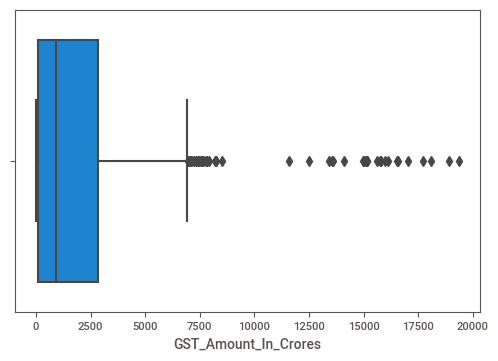

In [45]:
sns.boxplot(data.GST_Amount_In_Crores)

<AxesSubplot:xlabel='GST_Amount_In_Crores', ylabel='Density'>

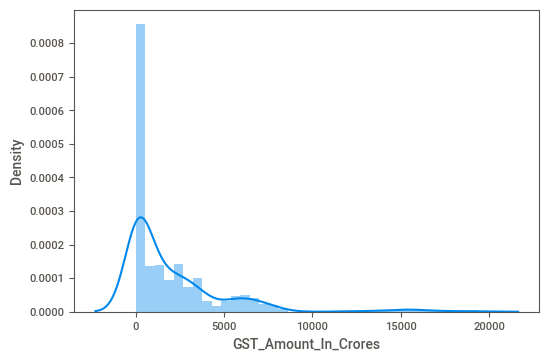

In [44]:
## ANalsyzing GST_Amount_In_Crores
sns.distplot(data.GST_Amount_In_Crores)
# Not Normal distribution
# Right-skewed


In [27]:
data.head()

,Year,Month,Date,State,GST_Amount_In_Crores
0,2019,Jan,2019-01-01,Jammu and Kashmir,331.0
1,2019,Jan,2019-01-01,Himachal Pradesh,647.0
2,2019,Jan,2019-01-01,Punjab,1216.0
3,2019,Jan,2019-01-01,Chandigarh,159.0
4,2019,Jan,2019-01-01,Uttarakhand,1146.0


In [49]:
data_gst=data[['Date','GST_Amount_In_Crores']]

In [50]:
data_gst.head()

,Date,GST_Amount_In_Crores
0,2019-01-01,331.0
1,2019-01-01,647.0
2,2019-01-01,1216.0
3,2019-01-01,159.0
4,2019-01-01,1146.0


In [51]:
data_gst=data_gst.set_index(['Date'])

In [52]:
data_gst.head()

,GST_Amount_In_Crores
Date,
2019-01-01,331.0
2019-01-01,647.0
2019-01-01,1216.0
2019-01-01,159.0
2019-01-01,1146.0


In [53]:
data_gst.shape

(975, 1)

In [54]:
data_gst = data_gst.groupby('Date').aggregate(np.sum)

In [55]:
data_gst.shape

(25, 1)

In [56]:
data_gst.head()

,GST_Amount_In_Crores
Date,
2019-01-01,77545.0
2019-02-01,74952.0
2019-03-01,82166.0
2019-06-01,77083.0
2019-08-01,72543.0


In [57]:
data_gst.describe()

,GST_Amount_In_Crores
count,25.000000
mean,80169.950800
std,7723.025489
min,66293.000000
25%,74952.000000
50%,81040.000000
75%,86513.000000
max,96428.000000


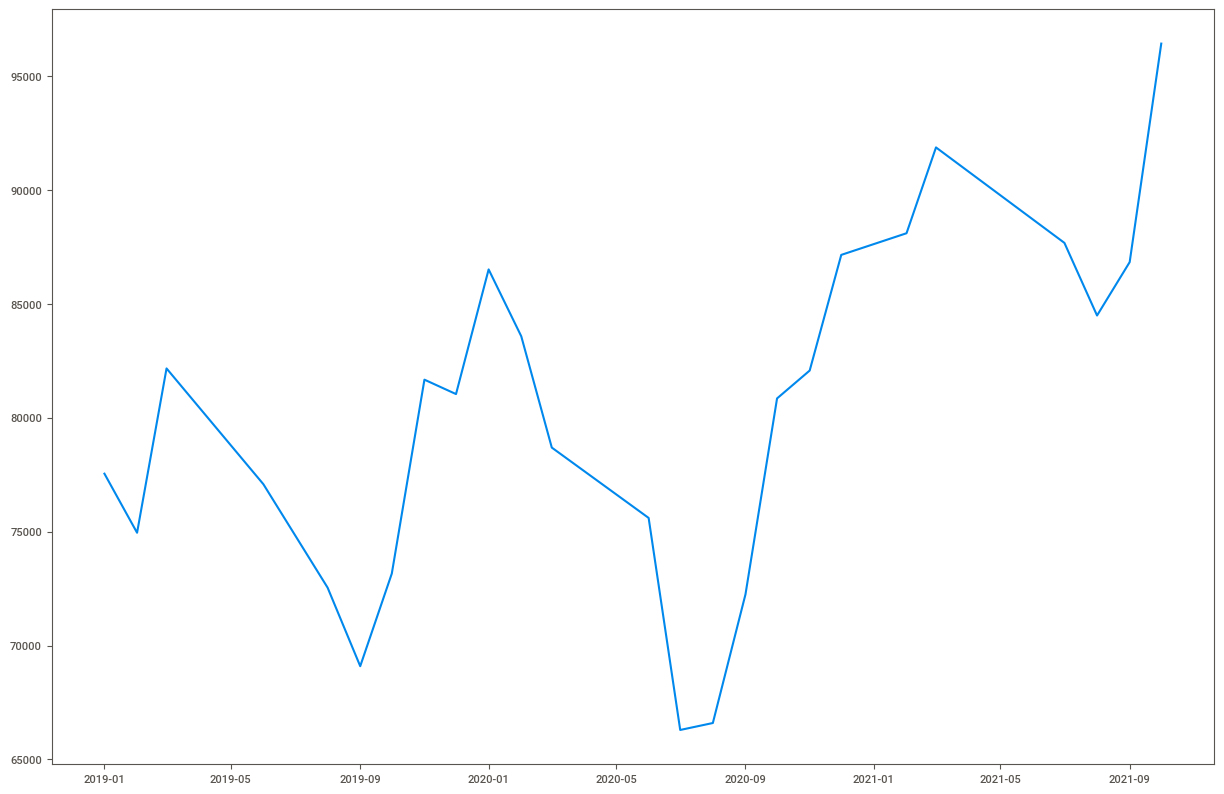

In [59]:
plt.figure(figsize=(15,10))
plt.plot(data_gst)
## from plot we can see the series given is not stationary

In [70]:
data_gst.to_excel('processed_GST_data.xlsx',index = True)